#Urmi Karmakar

## Importing necessary libraries

In [272]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


## Load the Breast Cancer Wisconsin dataset

In [273]:
data = load_breast_cancer()

## Convert the dataset into a DataFrame for easier exploration

In [274]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## Check for missing values

In [275]:
print(df.isnull().sum().sum())  # Should be 0 if no missing values exist


0


## Data Summary

In [276]:
print("\nSummary statistics:")
print(df.describe())  # Get summary statistics for numeric columns


Summary statistics:
       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             

## Preprocess the data

In [277]:
X = df.drop('target', axis=1)  # Features
y = df['target']  # Target variable

## Split the dataset into training and testing sets (80% training, 20% testing)

In [278]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Normalize/scale the data using StandardScaler (standardize features to have mean=0 and variance=1)

In [279]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Check the shape of the processed data
print(f"Training set shape: {X_train_scaled.shape}")
print(f"Test set shape: {X_test_scaled.shape}")

Training set shape: (455, 30)
Test set shape: (114, 30)


## Apply SelectKBest to extract the top 10 features

In [280]:
selector = SelectKBest(score_func=chi2, k=10)
X_train_new = selector.fit_transform(X_train, y_train)
X_test_new = selector.transform(X_test)

## Get selected feature names

In [281]:
selected_features = X.columns[selector.get_support()]
print("Selected Features:\n", selected_features)

Selected Features:
 Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'perimeter error', 'area error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area'],
      dtype='object')


## Feature distribution plots

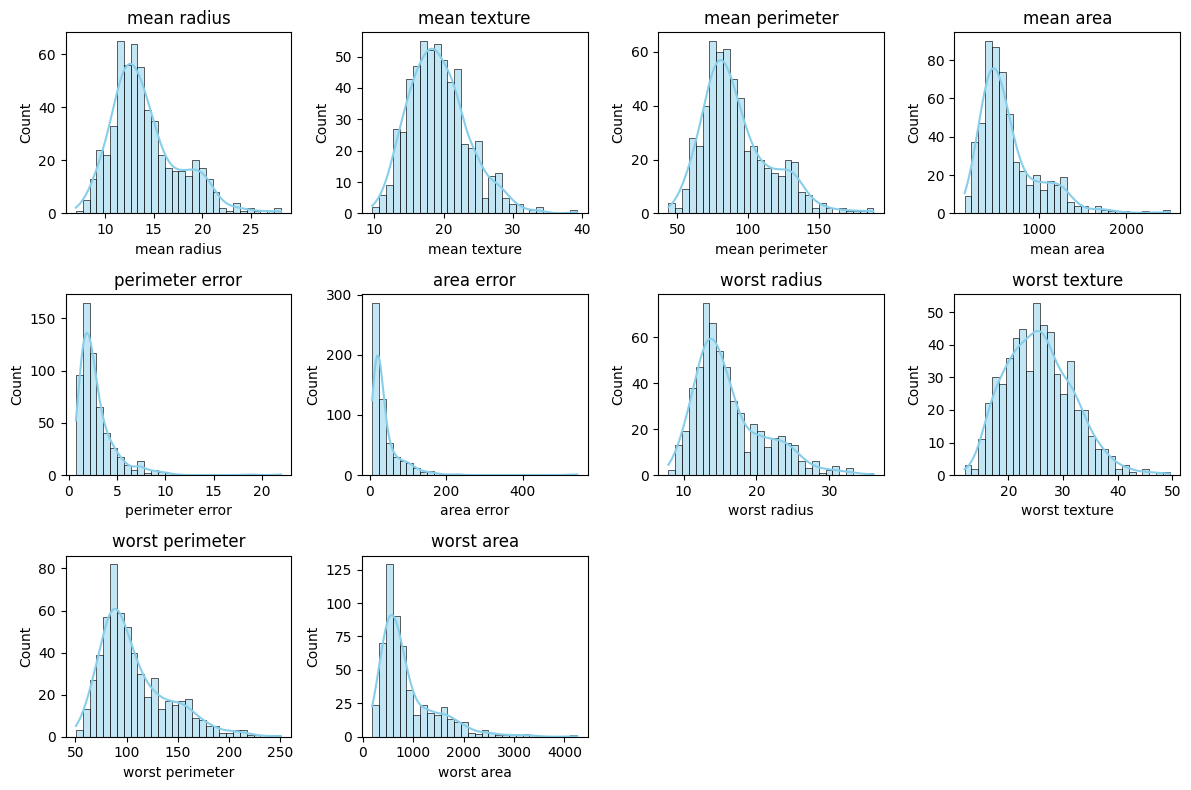

In [282]:
plt.figure(figsize=(12, 8))
for i, feature in enumerate(selected_features, 1):
    plt.subplot(3, 4, i)
    sns.histplot(df[feature], kde=True, bins=30, color='skyblue')
    plt.title(feature)
plt.tight_layout()
plt.show()

## Correlation heatmap of selected features

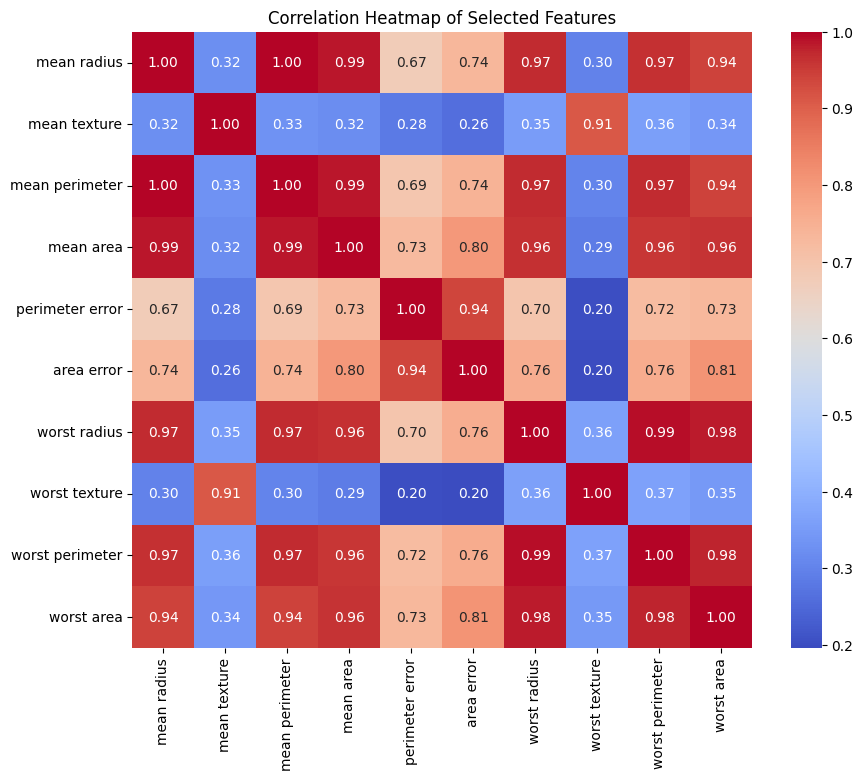

In [283]:
plt.figure(figsize=(10, 8))
correlation_matrix = df[selected_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Selected Features')
plt.show()

## Pairplot of selected features with target variable

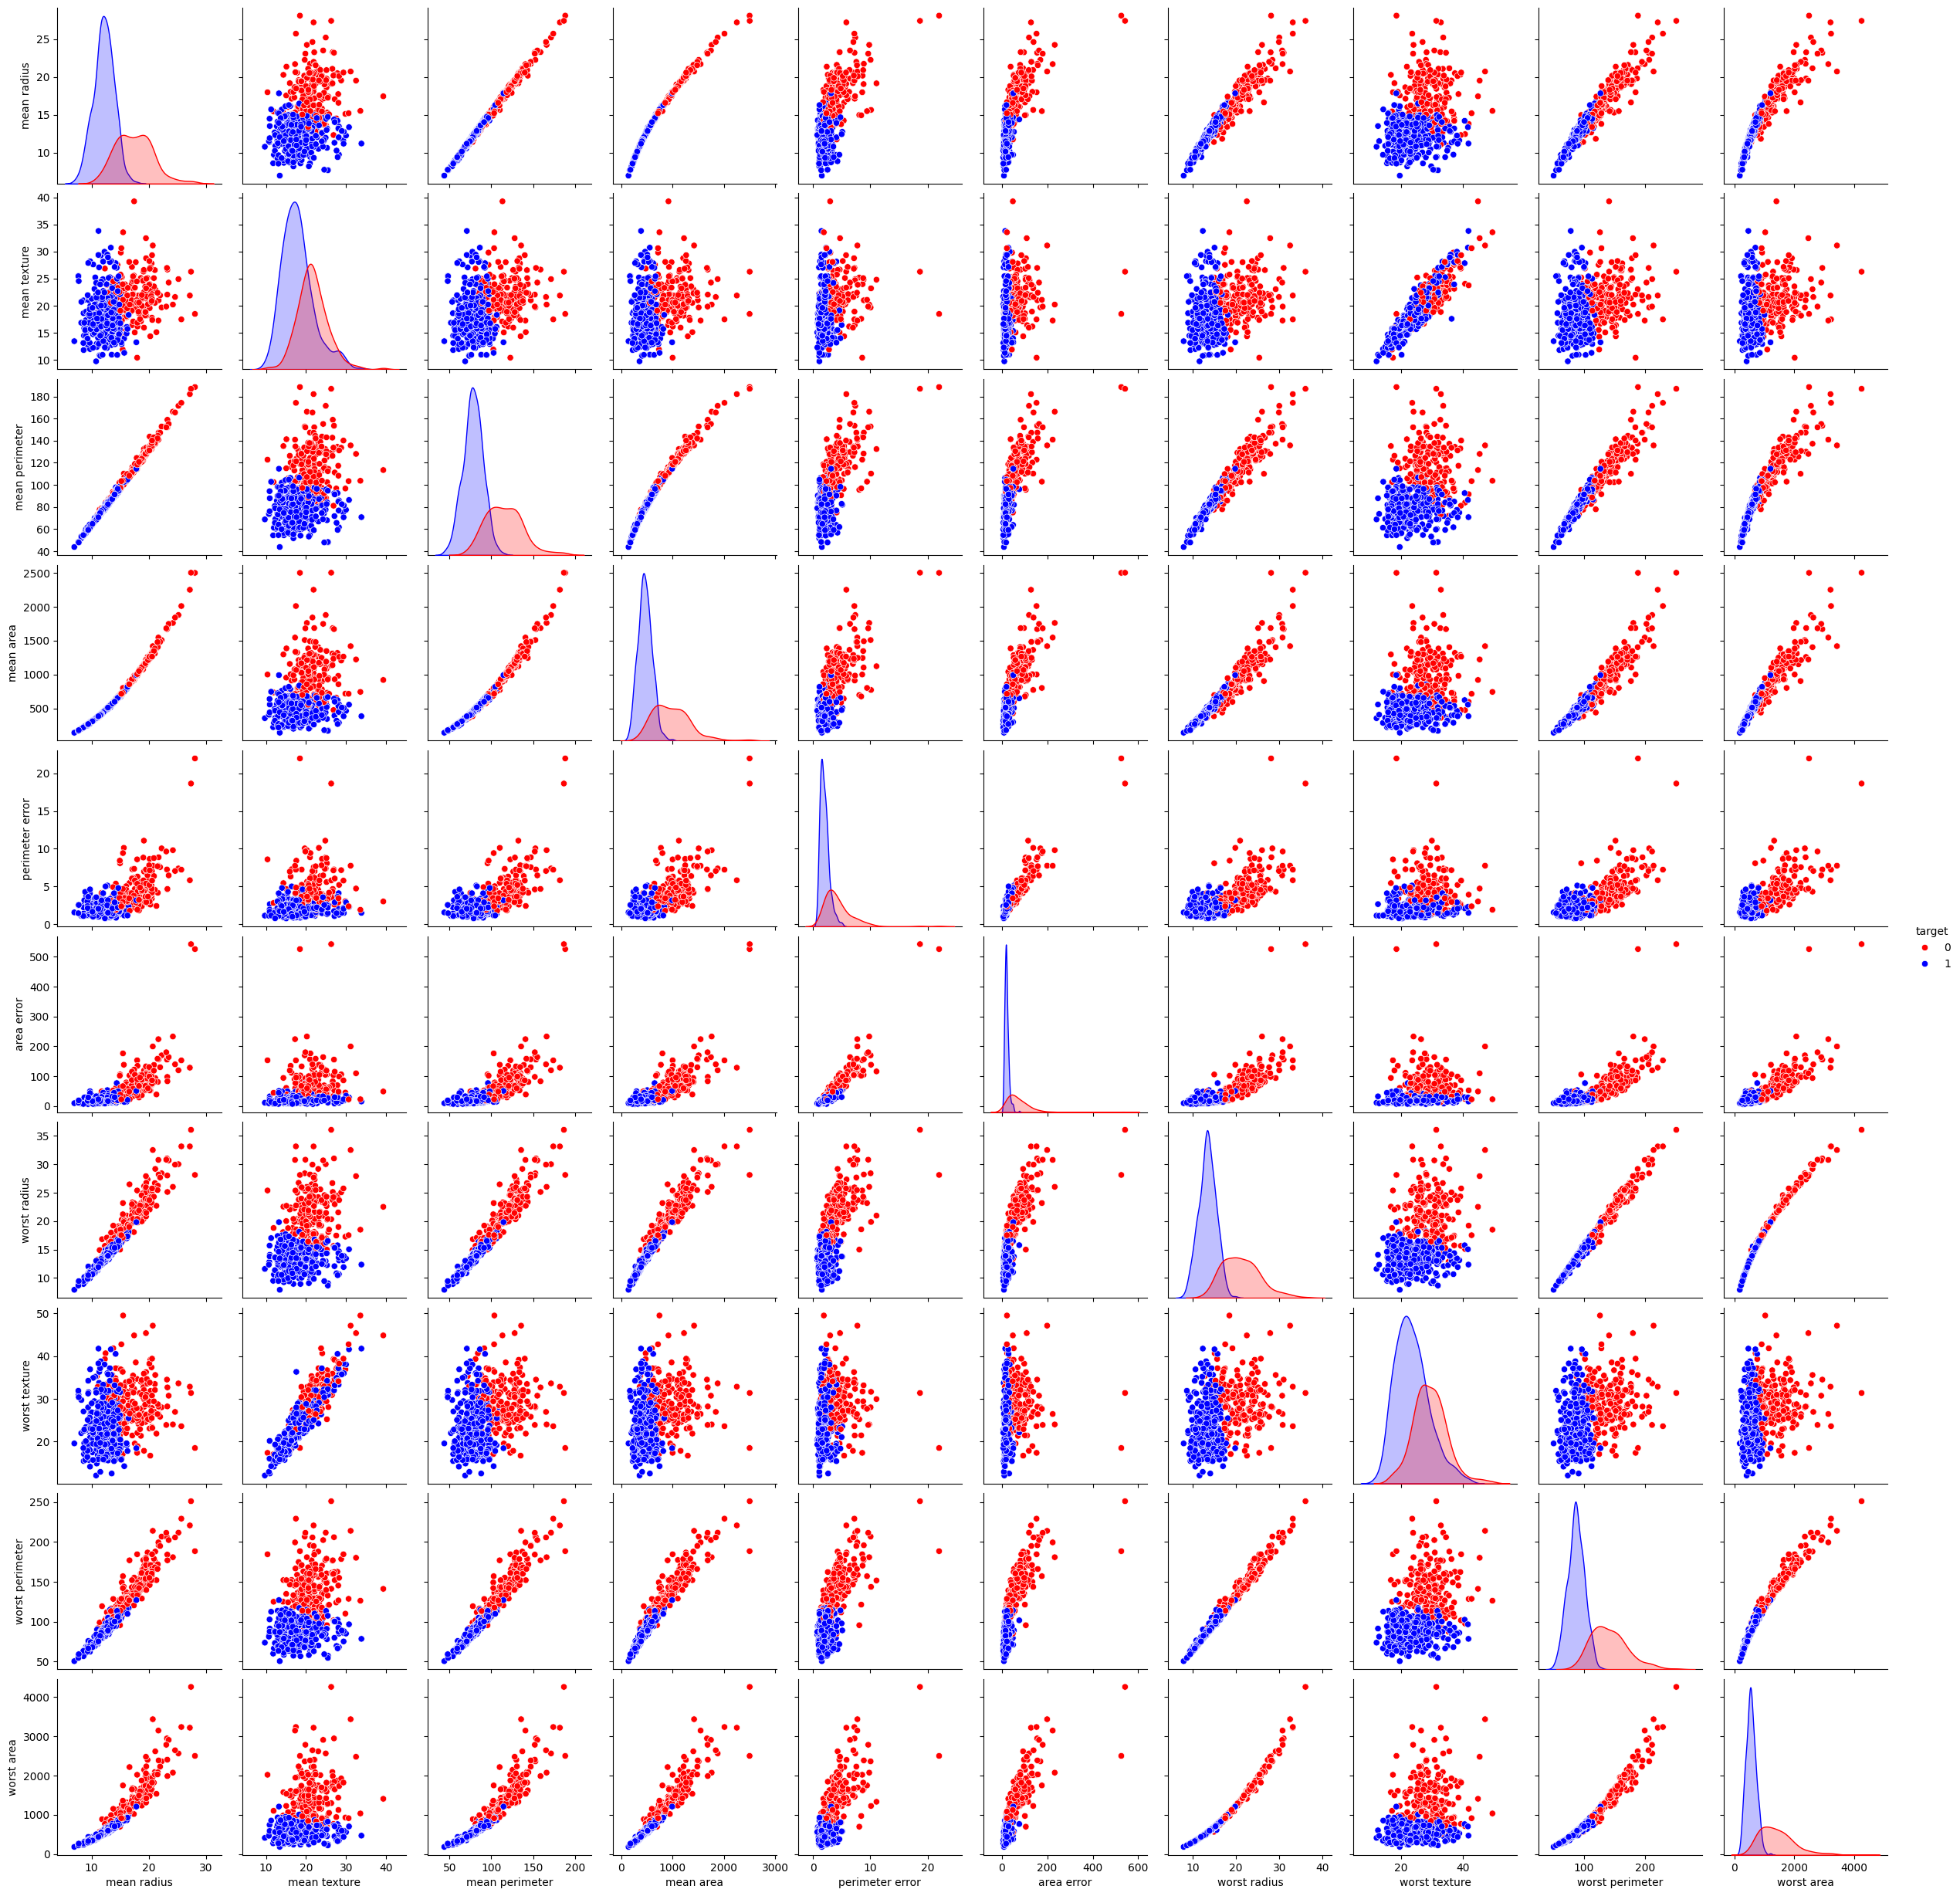

In [284]:
sns.pairplot(df[[*selected_features, 'target']], hue='target', palette=['red', 'blue'])
plt.show()

## Boxplots for outlier detection

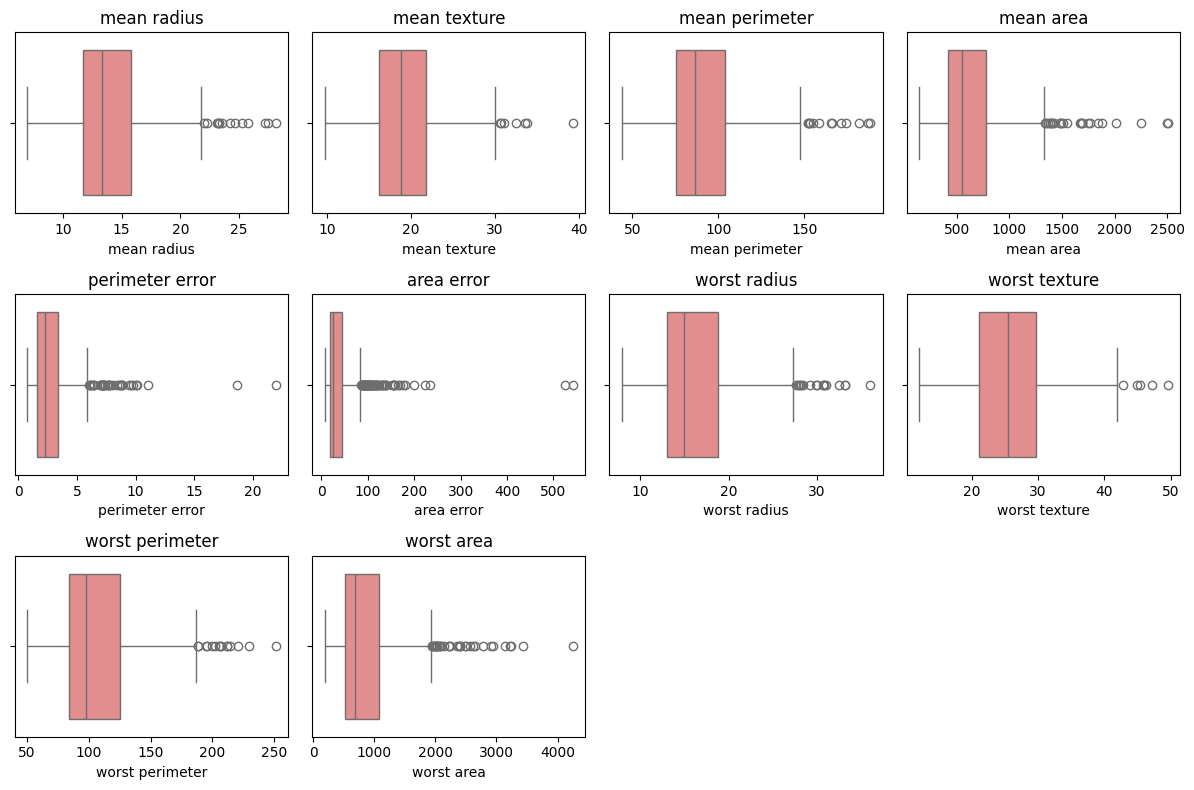

In [285]:
plt.figure(figsize=(12, 8))
for i, feature in enumerate(selected_features, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x=df[feature], color='lightcoral')
    plt.title(feature)
plt.tight_layout()
plt.show()

## Function to remove outliers using IQR method

In [286]:
def remove_outliers_iqr(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)  # First quartile (25th percentile)
        Q3 = df[column].quantile(0.75)  # Third quartile (75th percentile)
        IQR = Q3 - Q1  # Interquartile range

        lower_bound = Q1 - 1.5 * IQR  # Lower fence
        upper_bound = Q3 + 1.5 * IQR  # Upper fence

        # Remove rows where values are outside of the bounds
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df


## Remove outliers from selected features

In [287]:
df_cleaned = remove_outliers_iqr(df, selected_features)

print(f"Original dataset shape: {df.shape}")
print(f"Dataset shape after outlier removal: {df_cleaned.shape}")


Original dataset shape: (569, 31)
Dataset shape after outlier removal: (424, 31)


## Visualize boxplots after outlier removal

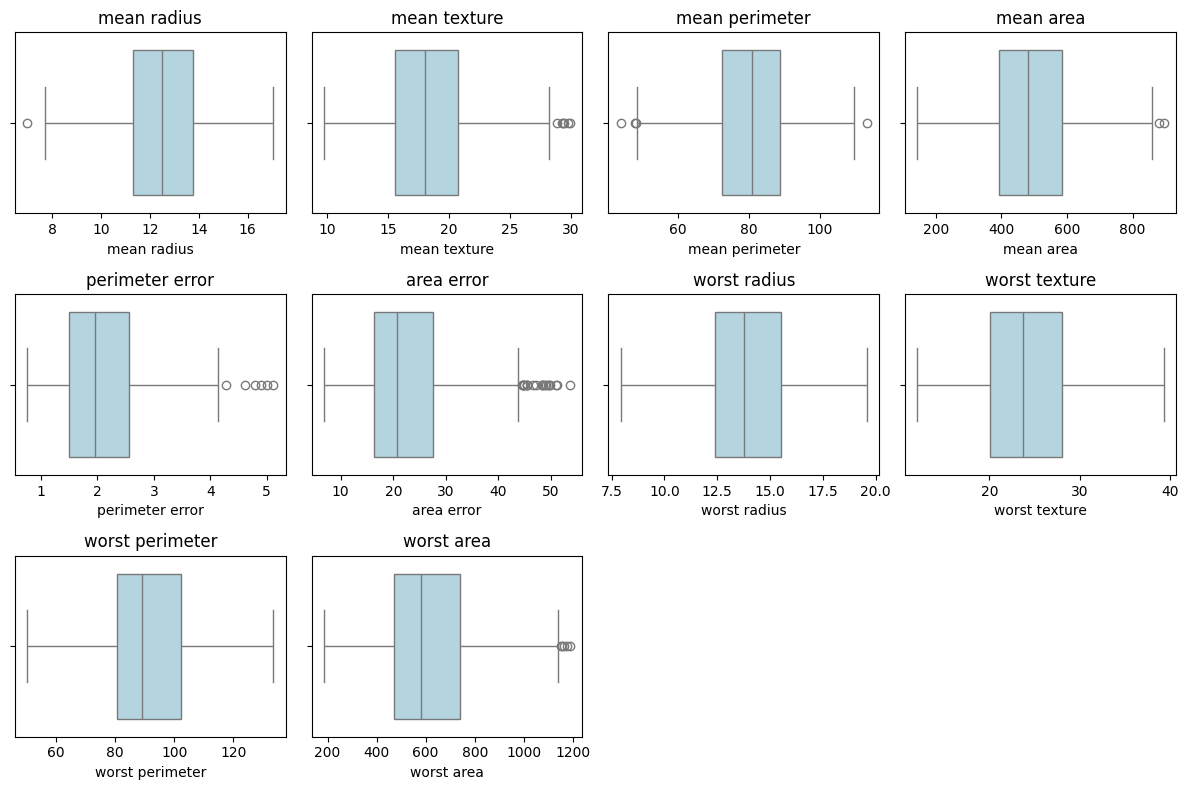

In [288]:
plt.figure(figsize=(12, 8))
for i, feature in enumerate(selected_features, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x=df_cleaned[feature], color='lightblue')
    plt.title(feature)
plt.tight_layout()
plt.show()

## Class distribution pie chart

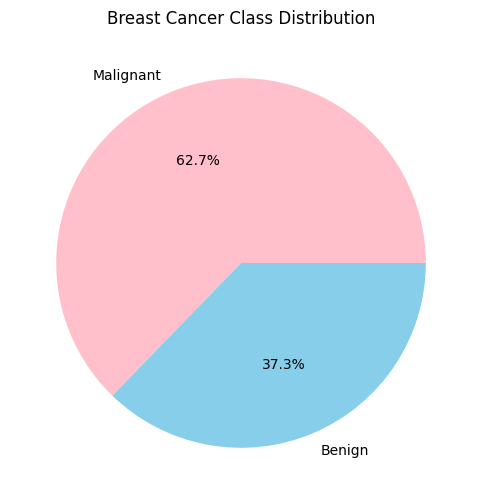

In [289]:
plt.figure(figsize=(6, 6))
plt.pie(df['target'].value_counts(), labels=['Malignant', 'Benign'], autopct='%1.1f%%', colors=['pink', 'skyblue'])
plt.title('Breast Cancer Class Distribution')
plt.show()

## PCA for dimensionality reduction visualization

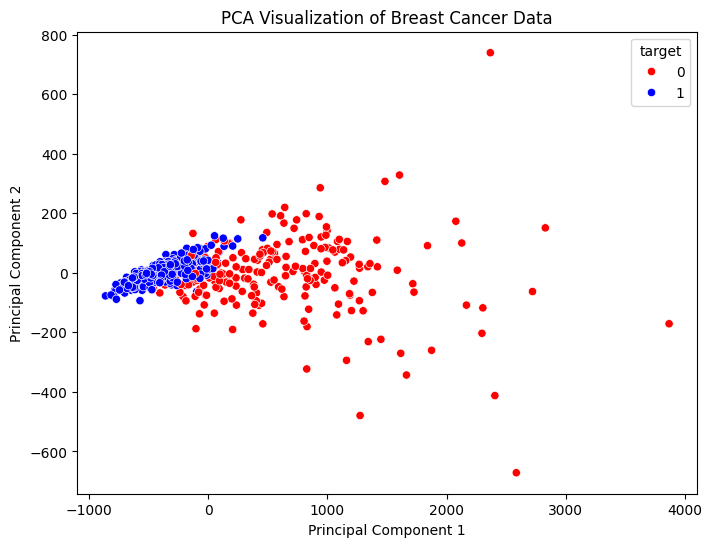

In [290]:
# Import PCA from sklearn.decomposition
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df[data.feature_names])
df['pca1'] = pca_result[:, 0]
df['pca2'] = pca_result[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(x='pca1', y='pca2', hue='target', palette=['red', 'blue'], data=df)
plt.title('PCA Visualization of Breast Cancer Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

#Logistic Regression Model

### Training the logistic regression model with the scaled training data and target labels


In [291]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

### Predicting the labels for the scaled test data using the trained logistic regression model


In [292]:
y_pred_log_reg = log_reg.predict(X_test_scaled)

### Evaluate the Logistic Regression model

In [293]:
print("Logistic Regression Accuracy :", accuracy_score(y_test, y_pred_log_reg))
# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_log_reg))

Logistic Regression Accuracy : 0.9736842105263158

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



### Function to plot the confusion matrix for a given model and its predictions


In [294]:
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

### Confusion matrix for Logistic Regression

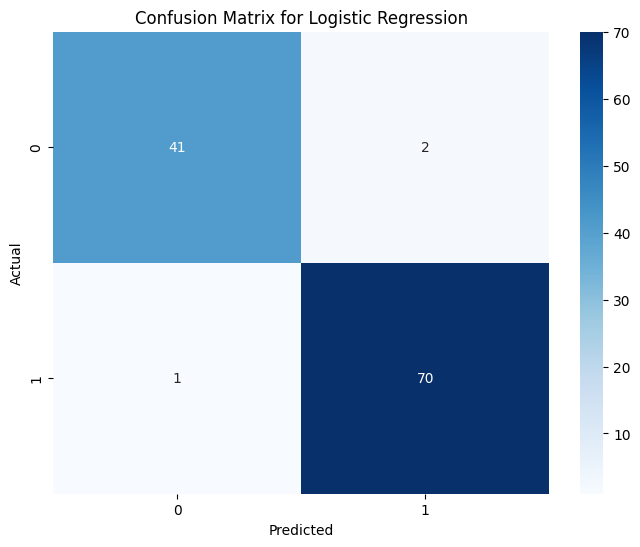

In [295]:
plot_confusion_matrix(y_test, y_pred_log_reg, "Logistic Regression")

##AUC (Area Under Curve)
###AUC = 0.5 → Random model (worst case)
###AUC > 0.7 → Decent model
###AUC > 0.9 → Excellent model

### Function to plot the ROC curve and calculate AUC for a given model and its predicted scores


In [296]:
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(y_test, y_scores, model_name):
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.4f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")
    plt.legend()
    plt.show()

### ROC curve for Logistic Regression with predicted probabilities


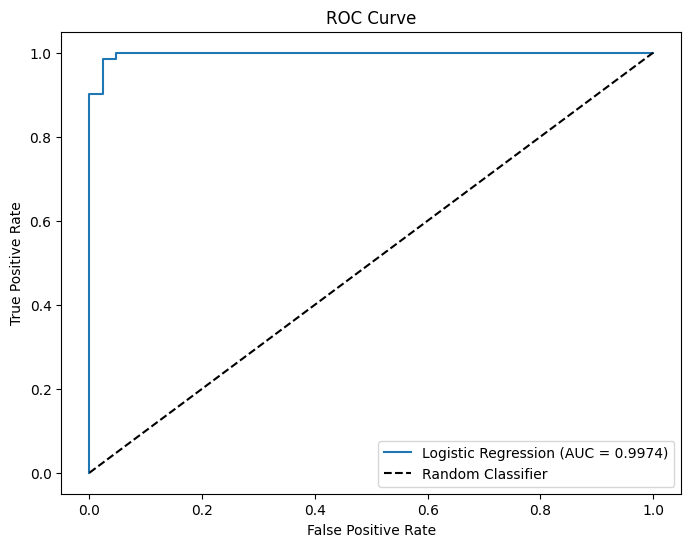

In [297]:
plot_roc_curve(y_test, y_prob_log_reg[:, 1], "Logistic Regression")

#Support Vector Machine (SVM) Model

### Training the Support Vector Machine (SVM) model with scaled training data


In [298]:
svm = SVC(random_state=42, probability=True)
svm.fit(X_train_scaled, y_train)

SVC(probability=True, random_state=42)

### Predicting the labels for the scaled test data using the trained SVM model


In [299]:
y_pred_svm = svm.predict(X_test_scaled)

### Evaluate the Support Vector Machine (SVM) model

In [300]:
print("Support Vector Machine (SVM) Accuracy :", accuracy_score(y_test, y_pred_svm))
# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))

Support Vector Machine (SVM) Accuracy : 0.9824561403508771

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



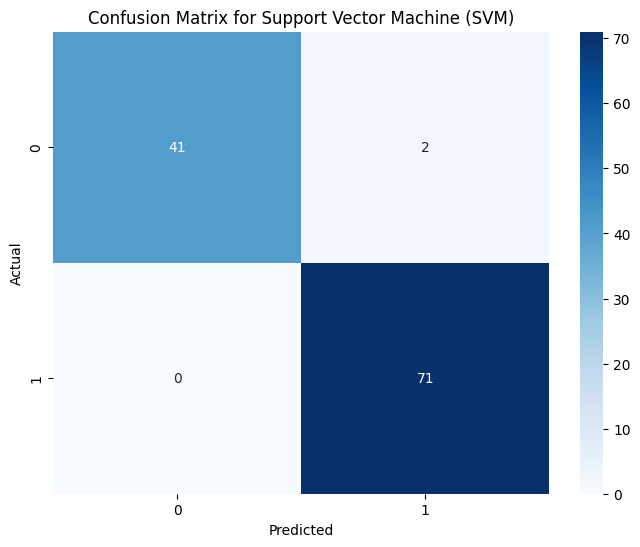

In [301]:
plot_confusion_matrix(y_test, y_pred_svm, "Support Vector Machine (SVM)")

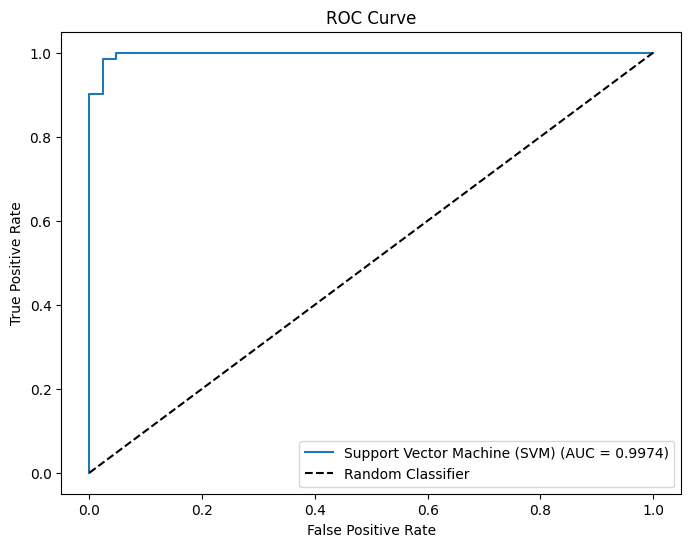

In [302]:
plot_roc_curve(y_test, y_prob_log_reg[:, 1], "Support Vector Machine (SVM)")

# Decision Tree Classifier Model

### Training the Decision Tree model with scaled training data


In [303]:
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

### Predicting the labels for the scaled test data using the trained Decision Tree model


In [304]:
y_pred_decision_tree = decision_tree.predict(X_test_scaled)

### Evaluate the Decision Tree model

In [305]:
print("Decision Tree Accuracy :", accuracy_score(y_test, y_pred_decision_tree))
# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_decision_tree))

Decision Tree Accuracy : 0.9473684210526315

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



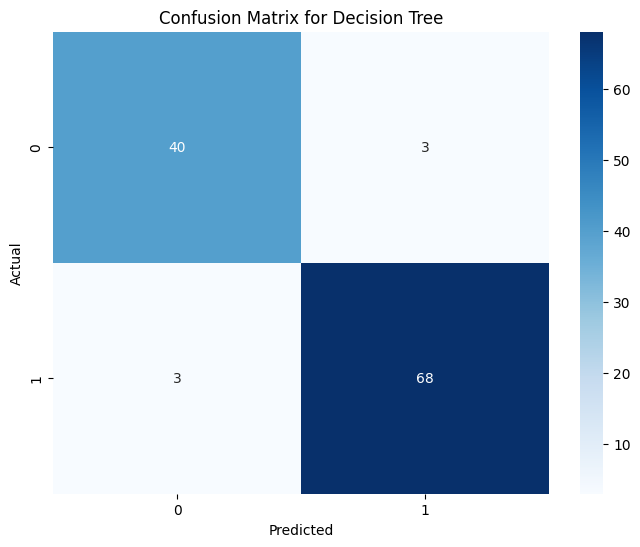

In [306]:
plot_confusion_matrix(y_test, y_pred_decision_tree, "Decision Tree")

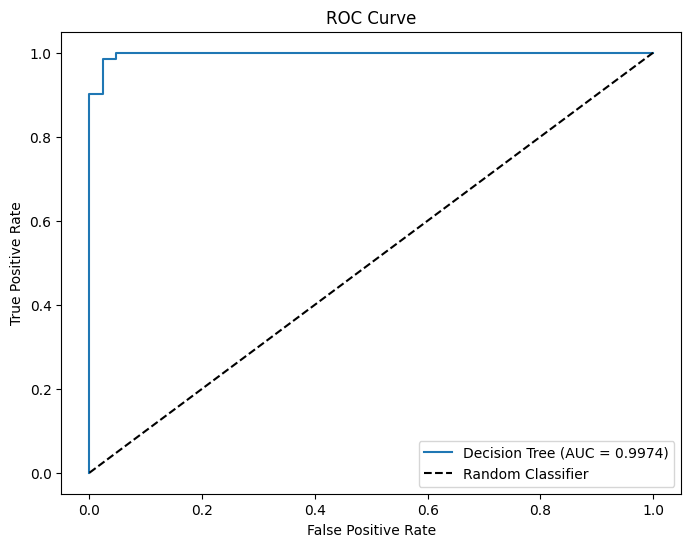

In [307]:
plot_roc_curve(y_test, y_prob_log_reg[:, 1], "Decision Tree")

# Random Forest Classifier Model

### Training the Random Forest model with scaled training data


In [308]:
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

### Predicting the labels for the scaled test data using the trained Random Forest model


In [309]:
y_pred_random_forest = random_forest.predict(X_test_scaled)

### Evaluate the Random Forest model

In [310]:
print("Random Forest Accuracy :", accuracy_score(y_test, y_pred_random_forest))
# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_random_forest))


Random Forest Accuracy : 0.9649122807017544

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



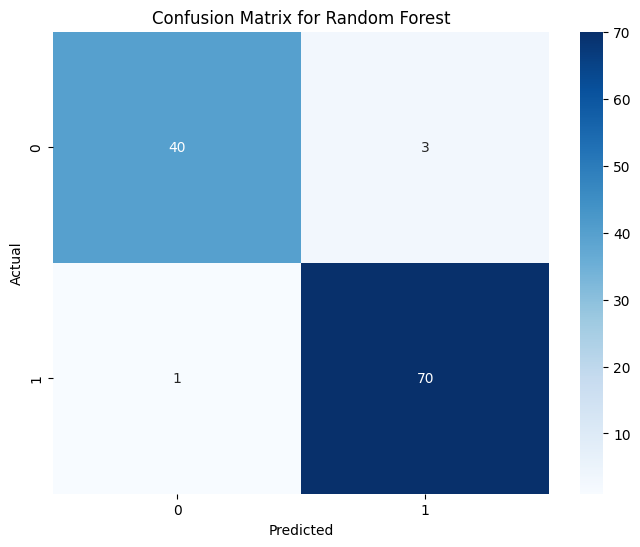

In [311]:
plot_confusion_matrix(y_test, y_pred_random_forest, "Random Forest")

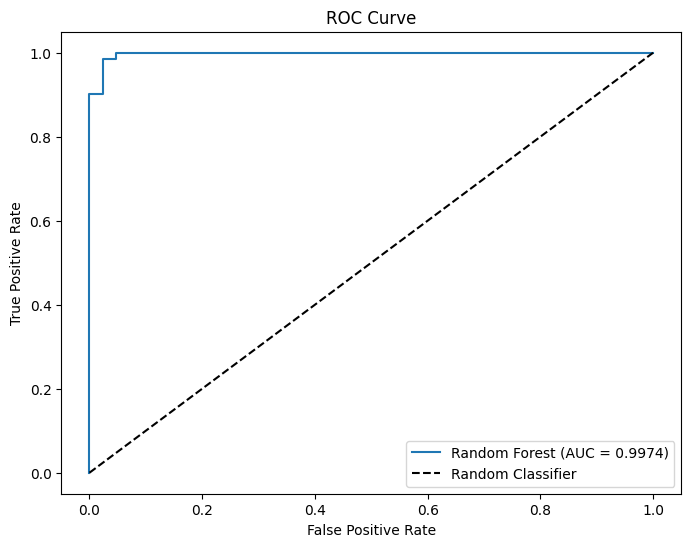

In [312]:
plot_roc_curve(y_test, y_prob_log_reg[:, 1], "Random Forest")

### Feature importance plot for Random Forest

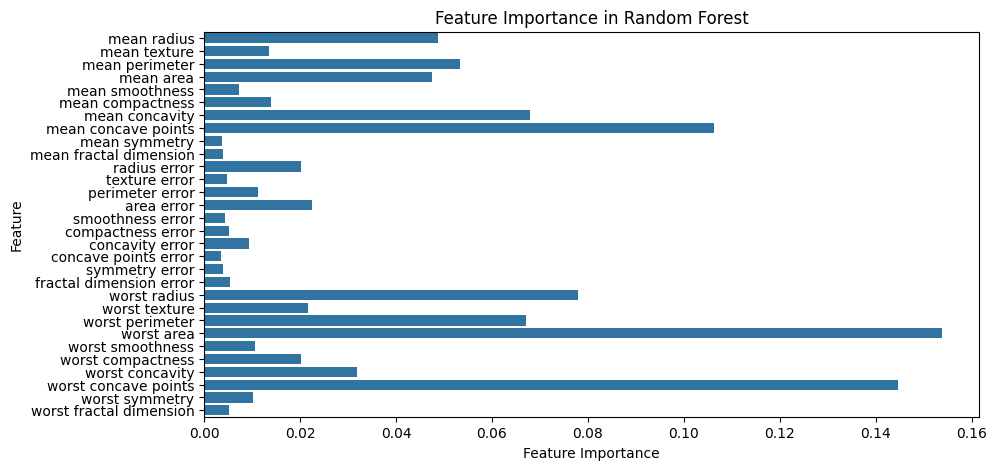

In [313]:
# Feature importance plot for Random Forest
importances = random_forest.feature_importances_  # Get feature importances
# Use the feature names from the training data (X) which should have 30 features after SelectKBest
feature_names = X.columns # Changed from df.columns to X.columns

# Plot feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x=importances, y=feature_names)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in Random Forest")
plt.show()

# K-Nearest Neighbors Classifier Model

### Training the K-Nearest Neighbors (KNN) model with scaled training data


In [314]:
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)


KNeighborsClassifier()

### Predicting the labels for the scaled test data using the trained KNN model


In [315]:
y_pred_knn = knn.predict(X_test_scaled)

### Evaluate the K-Nearest Neighbors(KNN) model

In [316]:
print("K-Nearest Neighbors Classifier Accuracy :", accuracy_score(y_test, y_pred_knn))
# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))

K-Nearest Neighbors Classifier Accuracy : 0.9473684210526315

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



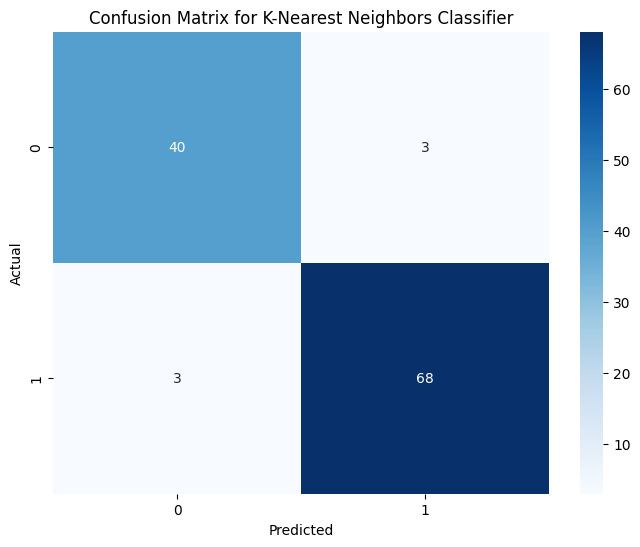

In [317]:
plot_confusion_matrix(y_test, y_pred_knn, "K-Nearest Neighbors Classifier")

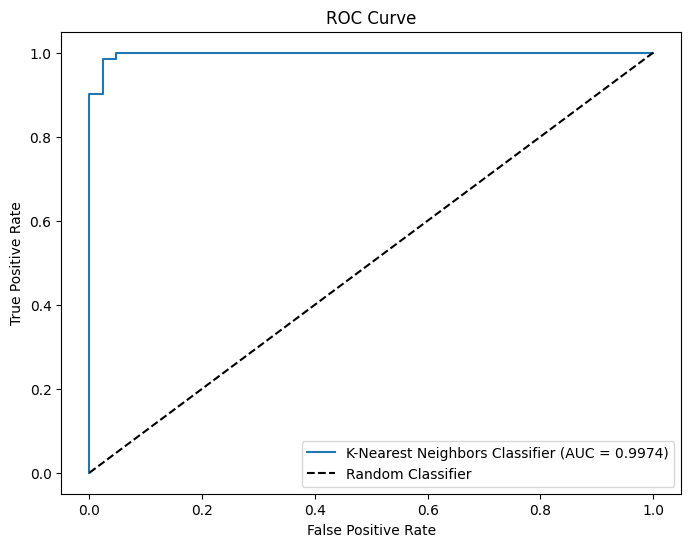

In [318]:
plot_roc_curve(y_test, y_prob_log_reg[:, 1], "K-Nearest Neighbors Classifier")

# Naive Bayes Classifier Model

### Training the Naive Bayes model with scaled training data


In [319]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train_scaled, y_train)


GaussianNB()

### Predicting the labels for the scaled test data using the trained Naive Bayes model


In [320]:
y_pred_naive_bayes = naive_bayes.predict(X_test_scaled)

### Evaluate the Naive Bayes model

In [321]:
print("Naive Bayes Accuracy :", accuracy_score(y_test, y_pred_naive_bayes))
# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_naive_bayes))

Naive Bayes Accuracy : 0.9649122807017544

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



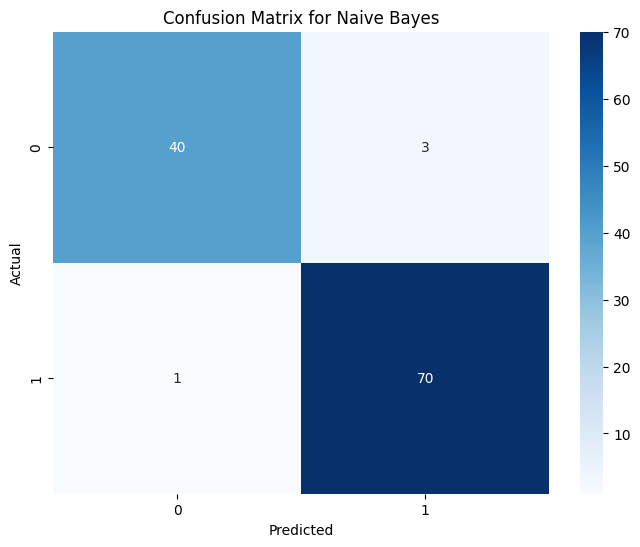

In [322]:
plot_confusion_matrix(y_test, y_pred_naive_bayes, "Naive Bayes")

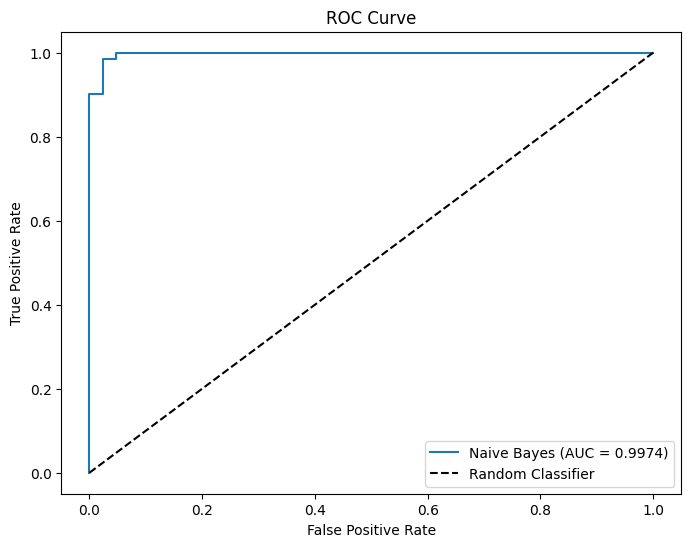

In [323]:
plot_roc_curve(y_test, y_prob_log_reg[:, 1], "Naive Bayes")

# Neural Network (MLP Classifier) Model

### Training the Multi-layer Perceptron (MLP) model with scaled training data


In [324]:
mlp = MLPClassifier(random_state=42, max_iter=1000)
mlp.fit(X_train_scaled, y_train)

MLPClassifier(max_iter=1000, random_state=42)

### Predicting the labels for the scaled test data using the trained MLP model


In [325]:
y_pred_mlp = mlp.predict(X_test_scaled)

### Evaluate the Neural Network (MLP) model

In [326]:
print("Neural Network (MLP) Accuracy :", accuracy_score(y_test, y_pred_mlp))
# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_mlp))

Neural Network (MLP) Accuracy : 0.9736842105263158

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



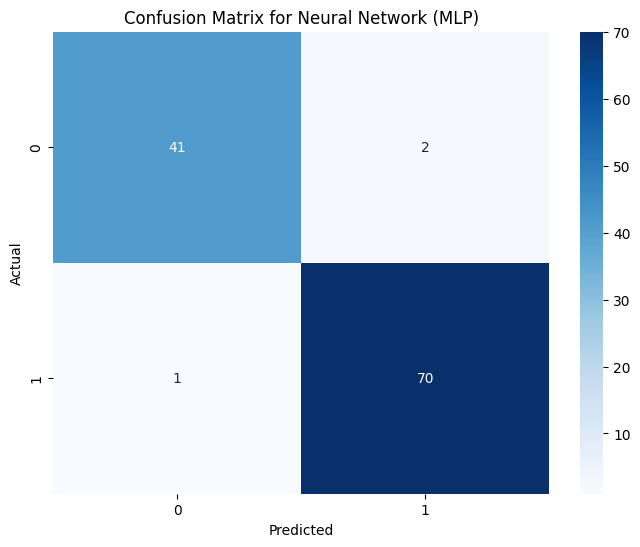

In [327]:
plot_confusion_matrix(y_test, y_pred_mlp, "Neural Network (MLP)")

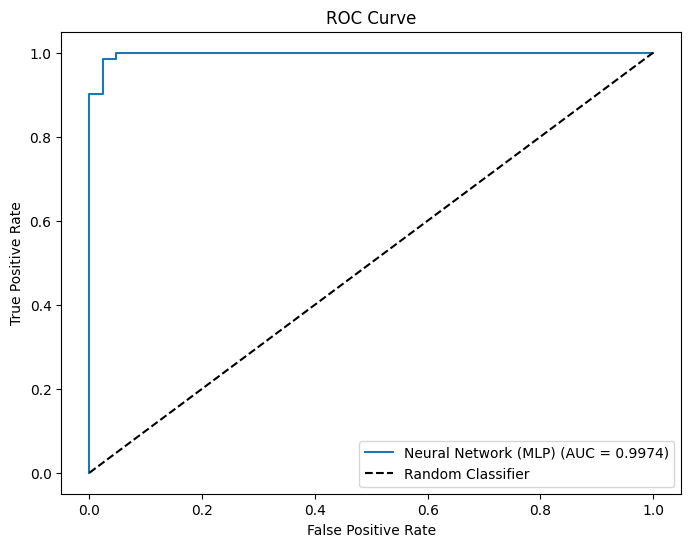

In [328]:
plot_roc_curve(y_test, y_prob_log_reg[:, 1], "Neural Network (MLP)")

# Ensemble Learning: Voting Classifier Model

### Training the Voting Classifier with multiple models using hard voting


In [329]:
# Ensemble Learning: Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('log_reg', log_reg),
    ('svm', svm),
    ('decision_tree', decision_tree),
    ('random_forest', random_forest),
    ('knn', knn),
    ('naive_bayes', naive_bayes),
    ('mlp', mlp)
], voting='hard')

voting_clf.fit(X_train_scaled, y_train)


VotingClassifier(estimators=[('log_reg', LogisticRegression(random_state=42)),
                             ('svm', SVC(probability=True, random_state=42)),
                             ('decision_tree',
                              DecisionTreeClassifier(random_state=42)),
                             ('random_forest',
                              RandomForestClassifier(random_state=42)),
                             ('knn', KNeighborsClassifier()),
                             ('naive_bayes', GaussianNB()),
                             ('mlp',
                              MLPClassifier(max_iter=1000, random_state=42))])

### Predicting the labels for the scaled test data using the trained Voting Classifier


In [330]:
y_pred_voting = voting_clf.predict(X_test_scaled)

### Evaluate the Ensemble model

In [331]:
print("Ensemble Learning (Voting Classifier) Accuracy :", accuracy_score(y_test, y_pred_voting))
# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_voting))

Ensemble Learning (Voting Classifier) Accuracy : 0.9736842105263158

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



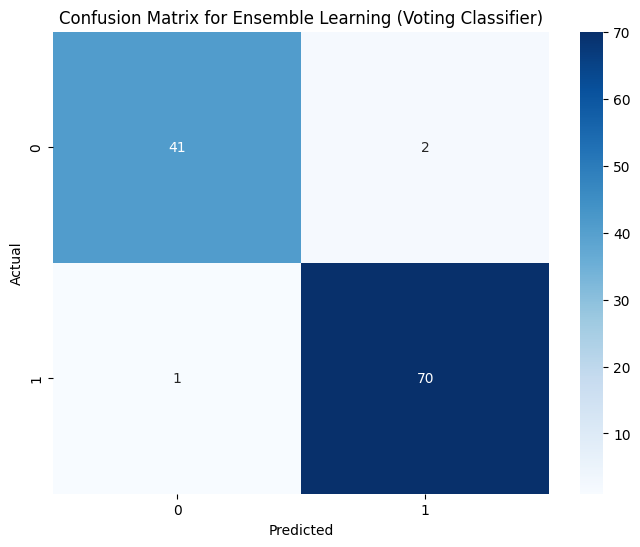

In [332]:
plot_confusion_matrix(y_test, y_pred_voting, "Ensemble Learning (Voting Classifier)")

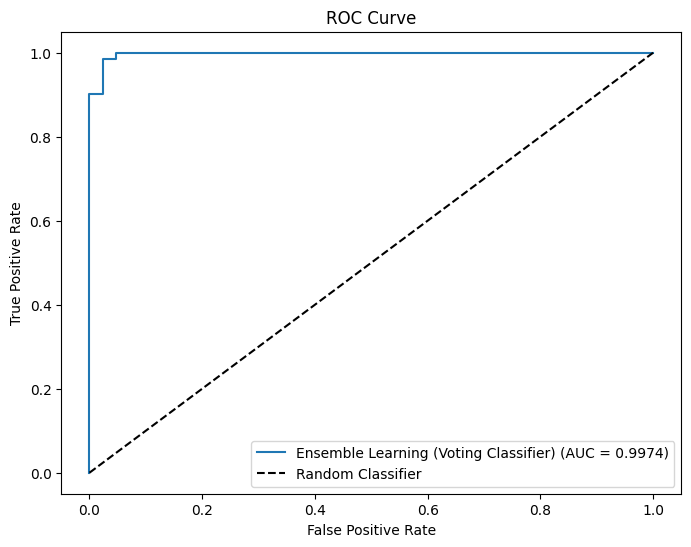

In [333]:
plot_roc_curve(y_test, y_prob_log_reg[:, 1], "Ensemble Learning (Voting Classifier)")

## Comparing the accuracy scores of multiple models on the test data


In [334]:
# Compare the models
models = {
    'Logistic Regression': y_pred_log_reg,
    'SVM': y_pred_svm,
    'Decision Tree': y_pred_decision_tree,
    'Random Forest': y_pred_random_forest,
    'KNN': y_pred_knn,
    'Naive Bayes': y_pred_naive_bayes,
    'Neural Network': y_pred_mlp,
    'Ensemble Voting': y_pred_voting
}

# Accuracy scores for all models
accuracy_scores = {}
for model_name, y_pred in models.items():
    accuracy_scores[model_name] = accuracy_score(y_test, y_pred)

# Display the accuracy of each model
print("\nModel Comparison (Accuracy):")
for model_name, accuracy in accuracy_scores.items():
    print(f"{model_name}: {accuracy:.4f}")



Model Comparison (Accuracy):
Logistic Regression: 0.9737
SVM: 0.9825
Decision Tree: 0.9474
Random Forest: 0.9649
KNN: 0.9474
Naive Bayes: 0.9649
Neural Network: 0.9737
Ensemble Voting: 0.9737


## Identifying and displaying the best-performing model based on accuracy


In [335]:
# Find the best-performing model
best_model = max(accuracy_scores, key=accuracy_scores.get)
best_accuracy = accuracy_scores[best_model]

# Display the best model
print(f"The best-performing model is {best_model} with an accuracy of {best_accuracy:.4f}.")


The best-performing model is SVM with an accuracy of 0.9825.
